<a href="https://colab.research.google.com/github/Y-golabchi/Getting_Started/blob/main/EDZ_PolyReg_Logistic_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Polynomial Regressions will be implemented then Three Different Algorithms will be used for the classification

**Machine Learning**
*   Polynomial Regression
*   Logistic Regression
*   Support Vector Machine (SVM)
*   K-Nearest Neighbors (KNN)
  
**Deep Learning**
*   Artificial Neural Network (ANN)
*   Convolutional Neural Network (CNN)



# Importing libraries and plotting the initial graph to have an idea

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorboard as tb
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [ ]:
edz=pd.read_csv('/content/EDZ.csv', header = 0)

In [ ]:
edz

,SigMax/CI,r/a,Region
0,2.542783,1.184615,HDZ
1,2.789586,1.215385,HDZ
2,2.451743,1.153846,HDZ
3,2.468652,1.215385,HDZ
4,2.512763,1.215385,HDZ
...,...,...,...
1296,1.603217,1.538462,EDZo
1297,1.726974,1.615385,EDZo
1298,2.863636,2.030769,EDZo
1299,1.335651,1.338462,EDZo


In [ ]:
edz.shape

(1301, 3)

In [ ]:
edz.describe()

,SigMax/CI,r/a
count,1301.000000,1301.000000
mean,2.021162,1.375793
std,0.698898,0.260048
min,1.050000,1.007692
25%,1.500000,1.184615
50%,1.904014,1.338462
75%,2.451743,1.492308
max,5.580357,3.646154


In [ ]:
change = LabelEncoder()
edz['Region'] = change.fit_transform(edz['Region'].astype('str'))
classes=change.classes_

In [ ]:
edz

,SigMax/CI,r/a,Region
0,2.542783,1.184615,2
1,2.789586,1.215385,2
2,2.451743,1.153846,2
3,2.468652,1.215385,2
4,2.512763,1.215385,2
...,...,...,...
1296,1.603217,1.538462,1
1297,1.726974,1.615385,1
1298,2.863636,2.030769,1
1299,1.335651,1.338462,1


In [ ]:
list(change.inverse_transform([0, 1, 2]))

['EDZi', 'EDZo', 'HDZ']

In [ ]:
edz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SigMax/CI  1301 non-null   float64
 1   r/a        1301 non-null   float64
 2   Region     1301 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.6 KB


In [ ]:
edz.isnull().sum()

SigMax/CI    0
r/a          0
Region       0
dtype: int64

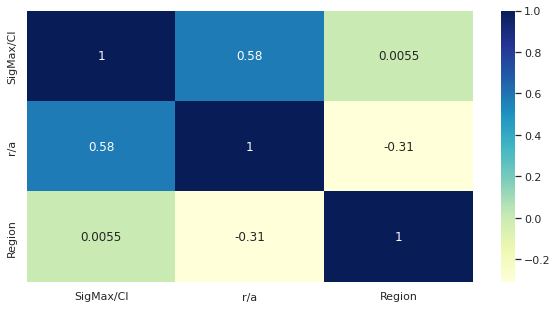

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)}) # enlarges the heatmap size
edz_corr = sns.heatmap(edz.corr(), cmap="YlGnBu", annot=True)

(1.0, 4.5)

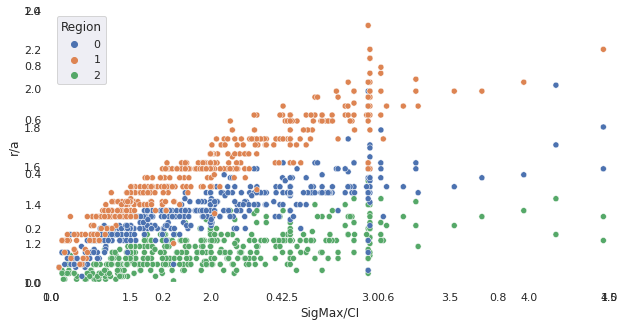

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
# plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color= 'red')
# plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color='blue')
# plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', color = 'green')
# plt.ylim(1.0, 2.5)
# plt.xlim(1, 6)
# plt.xlabel('SigMax/CI', size = 19)
# plt.ylabel('r/a', size =19)
# plt.title('Logistic Regression\'s Decision Boundaries', size =28)
# plt.legend(["EDZi", "EDZo", "HDZ", 'Decision boundary of HDZ and EDZi', 'Decision boundary of EDZi and EDZo'], loc = 'upper left')
# ax.set_facecolor("white")
# plt.grid()
# plt.show()
plt.gca(facecolor = 'white')
sns.scatterplot(x=edz['SigMax/CI'], y=edz['r/a'], data=edz, palette = 'deep', hue='Region')
plt.ylim(1, 2.4)
plt.xlim(1, 4.5)

# **1. Polynomial Regressions**

## 1.1 Initial steps common for the both regression models

In [ ]:
EDZi = edz[edz['Region']== 0]

Here we go to sort the values based on x-axis (Sigmax/CI) otherwise the regression

In [ ]:
EDZi.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)

In [ ]:
EDZi

,SigMax/CI,r/a,Region
473,1.050000,1.076923,0
625,1.068521,1.153846,0
835,1.068521,1.153846,0
564,1.077512,1.153846,0
549,1.085608,1.092308,0
...,...,...,...
812,4.464286,1.800000,0
852,5.208333,2.200000,0
672,5.208333,1.707692,0
838,5.580357,1.861538,0


In [ ]:
x_EDZi = np.array(EDZi ['SigMax/CI']).reshape(-1,1)
x_EDZi.shape

(436, 1)

In [ ]:
y_EDZi = np.array(EDZi['r/a']).reshape(-1,1)

In [ ]:
EDZo = edz[edz['Region'] == 1]
EDZo.sort_values(by='SigMax/CI', inplace= True, ascending= True)

In [ ]:
x_EDZo = np.array(EDZo['SigMax/CI']).reshape(-1,1)

In [ ]:
y_EDZo = np.array(EDZo['r/a']).reshape(-1,1)


In [ ]:
HDZ = edz[edz['Region'] == 2]
HDZ.sort_values(by='SigMax/CI', inplace=True, ascending =True)

In [ ]:
x_HDZ = np.array(HDZ['SigMax/CI']).reshape(-1,1)


In [ ]:
y_HDZ = np.array(HDZ['r/a']).reshape(-1,1)

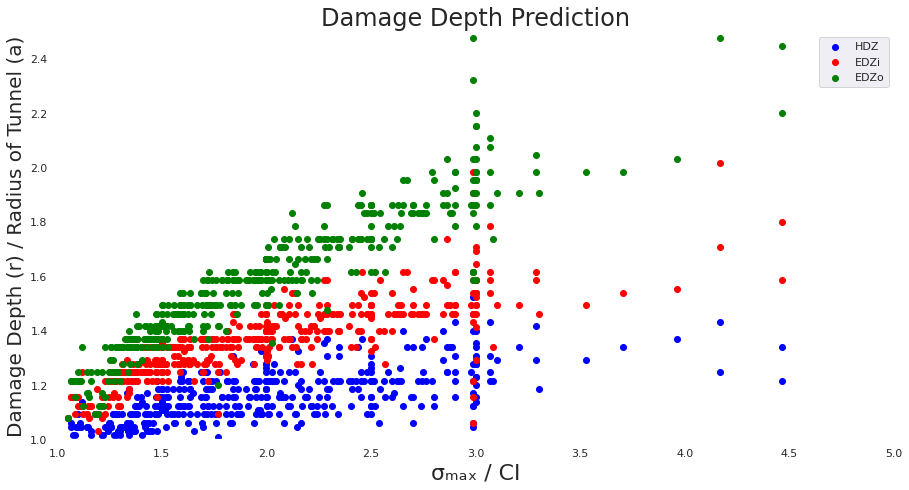

In [ ]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax= plt.axes(facecolor = 'w')
plt.scatter (x_HDZ, y_HDZ, color= 'blue', label = 'HDZ')
plt.scatter (x_EDZi, y_EDZi, color = 'red', label = 'EDZi')
plt.scatter (x_EDZo, y_EDZo, color = 'green', label = 'EDZo')
plt.xlim(1,5)
plt.title('Damage Depth Prediction', size= 24)
plt.ylim(1,2.5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.legend()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree= 2)

In [ ]:
print(y_HDZ.shape)
print(x_HDZ.shape)

(429, 1)
(429, 1)


In [ ]:
xp_HDZ = poly.fit_transform(x_HDZ)
xp_HDZ.shape

(429, 3)

##  1.2 Polynomial regression using **Stats models** Library

In [ ]:
import statsmodels.api as sm

model_HDZ = sm.OLS(y_HDZ, xp_HDZ).fit()
ypred_HDZ = np.array(model_HDZ.predict(xp_HDZ)).reshape(-1,1) 

# print(ypred_HDZ.shape)
# print(xp_HDZ.shape)
# print(x_HDZ.shape)
# print(y_HDZ.shape)

Text(0, 0.5, 'r/a')

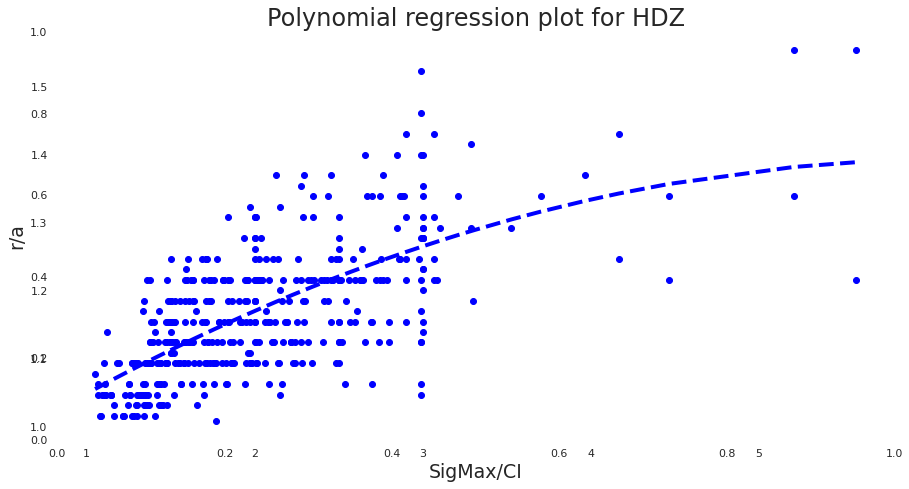

In [ ]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax= plt.gca(facecolor = 'w')
plt.scatter (x_HDZ, y_HDZ, color ='blue')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 4, linestyle='dashed', color = 'blue')
plt.title('Polynomial regression plot for HDZ', size= 24)
plt.xlabel('SigMax/CI', size = 19)
plt.ylabel('r/a',size=19)

In [ ]:
model_HDZ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           3.43e-58
Time:                        00:06:54   Log-Likelihood:                 523.91
No. Observations:                 429   AIC:                            -1042.
Df Residuals:                     426   BIC:                            -1030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8998      0.024     38.199      0.000       0.853       0.946
x1             0.1612      0.019      8.408      0.000       0.124       0.199
x2            -0.0132      0.004     -3.667      0.000      -0.020      -0.006
==============================================================================
Omnibus:                        7.869   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.783
Skew:                           0.297   Prob(JB):                       0.0204
Kurtosis:                       3.287   Cond. No.                         55.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
xp_EDZi = poly.fit_transform(x_EDZi)
xp_EDZi.shape

(436, 3)

In [ ]:
model_EDZi = sm.OLS(y_EDZi,xp_EDZi).fit()

In [ ]:
ypred_EDZi = np.array(model_EDZi.predict(xp_EDZi)).reshape(-1,1) 

Text(0, 0.5, 'r/a')

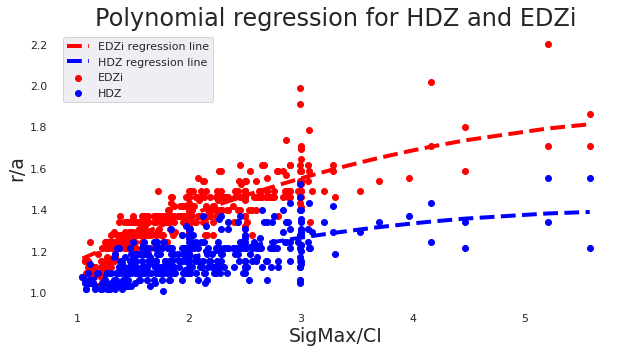

In [ ]:
ax= plt.gca(facecolor = 'w')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color='red')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 4, linestyle='dashed', label = 'EDZi regression line', color='red')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color ='blue')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 4, label = 'HDZ regression line', linestyle='dashed', color ='blue')
plt.legend(loc='upper left')
plt.title('Polynomial regression for HDZ and EDZi', size= 24)
plt.xlabel('SigMax/CI', size = 19)
plt.ylabel('r/a',size=19)

### 1.2.1 Plotting EDZi polynomial regression line with 95% and 68% prediction intervals

In [ ]:
model_EDZi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     488.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          9.71e-112
Time:                        00:06:55   Log-Likelihood:                 467.47
No. Observations:                 436   AIC:                            -928.9
Df Residuals:                     433   BIC:                            -916.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8883      0.027     33.194      0.000       0.836       0.941
x1             0.2852      0.022     13.018      0.000       0.242       0.328
x2            -0.0214      0.004     -5.190      0.000      -0.030      -0.013
==============================================================================
Omnibus:                       75.179   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.973
Skew:                          -0.071   Prob(JB):                    7.41e-228
Kurtosis:                      10.587   Cond. No.                         54.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
xp_EDZo = poly.fit_transform(x_EDZo)

In [ ]:
model_EDZo = sm.OLS(y_EDZo, xp_EDZo).fit()

In [ ]:
y_pred_EDZo = np.array(model_EDZo.predict(xp_EDZo)).reshape(-1,1)

In [ ]:
model_EDZo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1507.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          8.66e-196
Time:                        00:06:55   Log-Likelihood:                 384.77
No. Observations:                 436   AIC:                            -763.5
Df Residuals:                     433   BIC:                            -751.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8287      0.032     25.617      0.000       0.765       0.892
x1             0.3788      0.026     14.304      0.000       0.327       0.431
x2            -0.0002      0.005     -0.046      0.963      -0.010       0.010
==============================================================================
Omnibus:                      173.282   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3937.528
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                      17.544   Cond. No.                         54.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This just showed that 2nd degree polynomial regression is not good for EDZo so 3rd degree polynomial should be used instead to see the performance.

In [ ]:
# 3rd degree polynomial
poly_3 = PolynomialFeatures (degree = 3)
xp_EDZo = poly_3.fit_transform(x_EDZo)
model_EDZo = sm.OLS(y_EDZo, xp_EDZo).fit()
ypred_EDZo = np.array(model_EDZo.predict(xp_EDZo)).reshape(-1,1)
model_EDZo.summary()

# 2nd degree polynomial

# xp_EDZo_2 = poly.fit_transform(x_EDZo)
# model_EDZo = sm.OLS(y_EDZo, xp_EDZo_2).fit()
# ypred_EDZo_2 = np.array(model_EDZo.predict(xp_EDZo_2)).reshape(-1,1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1068.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.42e-199
Time:                        00:06:55   Log-Likelihood:                 396.85
No. Observations:                 436   AIC:                            -785.7
Df Residuals:                     432   BIC:                            -769.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4221      0.088      4.807      0.000       0.250       0.595
x1             0.8961      0.107      8.342      0.000       0.685       1.107
x2            -0.1952      0.040     -4.929      0.000      -0.273      -0.117
x3             0.0215      0.004      4.961      0.000       0.013       0.030
==============================================================================
Omnibus:                      193.156   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4071.704
Skew:                           1.374   Prob(JB):                         0.00
Kurtosis:                      17.717   Cond. No.                         681.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now this works better and it is concluded that EDZo regression should be in the order of 3

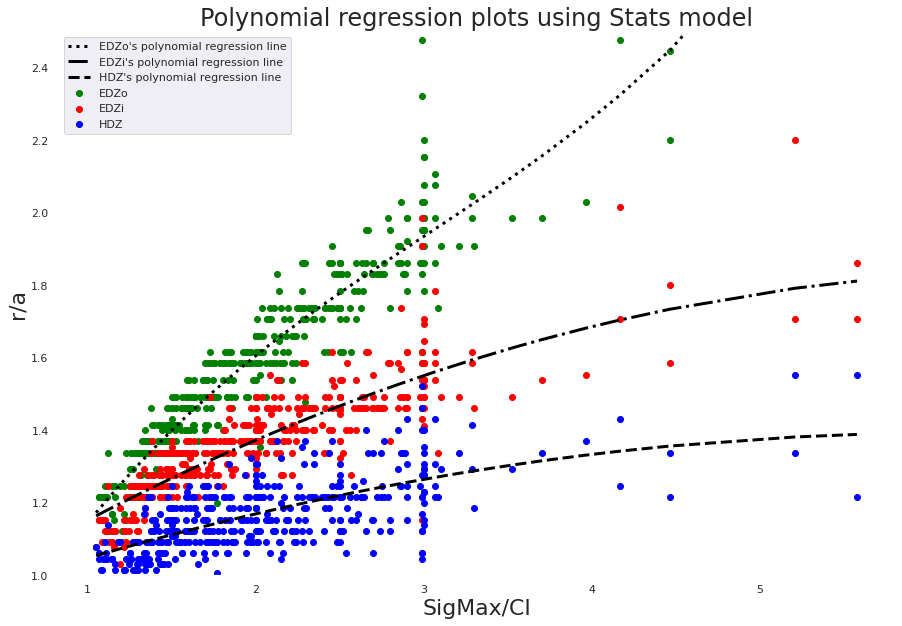

In [ ]:
plt.figure(figsize=(15, 10))
ax= plt.gca(facecolor = 'w')
plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', color = 'green')
plt.plot(x_EDZo, ypred_EDZo, linewidth = 3, linestyle='dotted', color = 'black', label= 'EDZo\'s polynomial regression line')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color='red')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 3, linestyle='dashdot', color = 'black', label= 'EDZi\'s polynomial regression line')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color='blue')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 3, linestyle='dashed', color = 'black', label= 'HDZ\'s polynomial regression line')
plt.ylim(1.0, 2.5)
plt.xlabel('SigMax/CI', size = 22)
plt.title('Polynomial regression plots using Stats model', size = 24)
plt.ylabel('r/a', size = 22)
plt.legend(loc='upper left')

### 1.2.2 Plotting HDZ polynomial regression line with 95% and 68% prediction intervals

(429, 1) (429, 1)


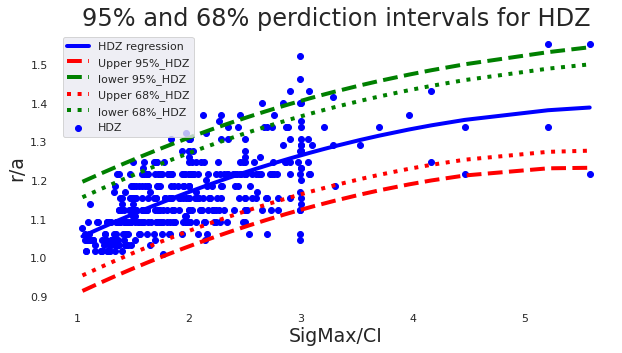

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_95, upper_95_HDZ,lower_95_HDZ = wls_prediction_std(model_HDZ, alpha =0.05)
_68, upper_68_HDZ,lower_68_HDZ = wls_prediction_std(model_HDZ, alpha =0.16)

ax= plt.gca(facecolor = 'w')
plt.scatter(x_HDZ, y_HDZ, color='blue', label = 'HDZ')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 4, color = 'blue', label= 'HDZ regression')
plt.plot(x_HDZ,upper_95_HDZ, linestyle='dashed', label="Upper 95%_HDZ",linewidth = 4, color='red')
plt.plot(x_HDZ,lower_95_HDZ, linestyle='dashed',label="lower 95%_HDZ",linewidth = 4, color='green')
plt.plot(x_HDZ,upper_68_HDZ, linestyle='dotted',label="Upper 68%_HDZ",linewidth = 4, color='red')
plt.plot(x_HDZ,lower_68_HDZ, linestyle='dotted',label="lower 68%_HDZ",linewidth = 4, color='green')
plt.legend(loc='upper left')
plt.title('95% and 68% perdiction intervals for HDZ', size = 24)
plt.xlabel('SigMax/CI', size= 19)
plt.ylabel('r/a', size=19)

print(y_HDZ.shape, ypred_HDZ.shape, )

### 1.2.3 Plotting EDZi polynomial regression line with 95% and 68% prediction intervals

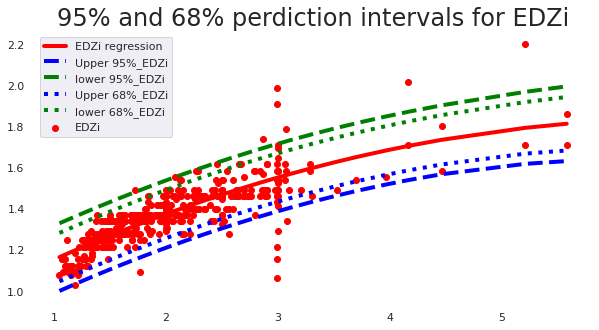

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_95, upper_95_EDZi,lower_95_EDZi = wls_prediction_std(model_EDZi, alpha =0.05)
_68, upper_68_EDZi,lower_68_EDZi = wls_prediction_std(model_EDZi, alpha =0.16)

ax= plt.gca(facecolor = 'w')
plt.scatter(x_EDZi, y_EDZi, color='red', label = 'EDZi')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 4, color = 'red', label= 'EDZi regression')
plt.plot(x_EDZi,upper_95_EDZi, linestyle='dashed', label="Upper 95%_EDZi",linewidth = 4, color='blue')
plt.plot(x_EDZi,lower_95_EDZi, linestyle='dashed',label="lower 95%_EDZi",linewidth = 4, color='green')
plt.plot(x_EDZi,upper_68_EDZi, linestyle='dotted',label="Upper 68%_EDZi",linewidth = 4, color='blue')
plt.plot(x_EDZi,lower_68_EDZi, linestyle='dotted',label="lower 68%_EDZi",linewidth = 4, color='green')
plt.title('95% and 68% perdiction intervals for EDZi', size = 24)
plt.legend(loc='upper left')
# fig.set_facecolor ('white')

### 1.2.4 Plotting EDZo polynomial regression line with 95% and 68% prediction intervals

Text(0.5, 1.0, '95% and 68% perdiction intervals for EDZo')

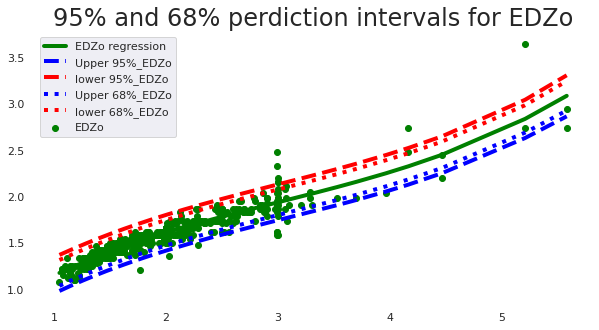

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_95, upper_95_EDZo,lower_95_EDZo = wls_prediction_std(model_EDZo, alpha =0.05)
_68, upper_68_EDZo,lower_68_EDZo = wls_prediction_std(model_EDZo, alpha =0.16)

ax= plt.gca(facecolor = 'w')
plt.scatter(x_EDZo, y_EDZo, color='green', label = 'EDZo')
plt.plot(x_EDZo, ypred_EDZo, linewidth = 4, color = 'green', label= 'EDZo regression')
plt.plot(x_EDZo,upper_95_EDZo, linestyle='dashed', label="Upper 95%_EDZo",linewidth = 4, color='blue')
plt.plot(x_EDZo,lower_95_EDZo, linestyle='dashed',label="lower 95%_EDZo",linewidth = 4, color='red')
plt.plot(x_EDZo,upper_68_EDZo, linestyle='dotted',label="Upper 68%_EDZo",linewidth = 4, color='blue')
plt.plot(x_EDZo,lower_68_EDZo, linestyle='dotted',label="lower 68%_EDZo",linewidth = 4, color='red')
plt.legend(loc='upper left')
plt.title('95% and 68% perdiction intervals for EDZo', size = 24)
# fig.set_facecolor ('white')

### 1.2.5 Plotting HDZ, EDZi, and EDZo polynomial regression line with 95% and 68% prediction intervals

Text(0.5, 1.0, '95% and 68% perdiction intervals for all regions')

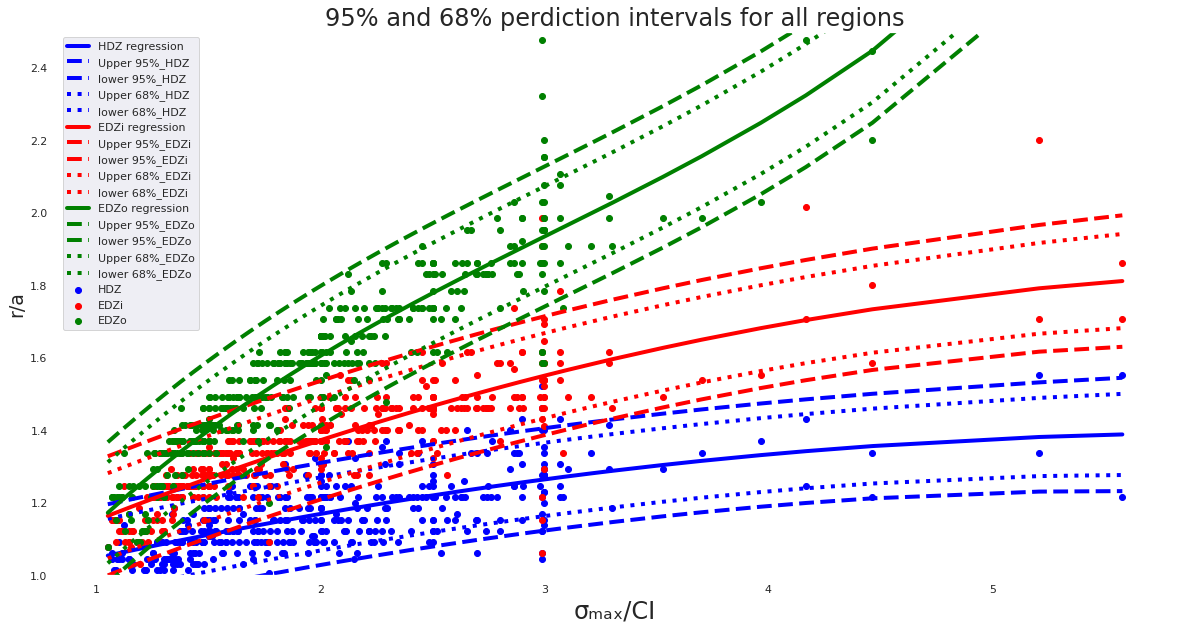

In [ ]:
plt.figure(figsize=(20, 10))
ax= plt.gca(facecolor = 'w')
#HDZ
plt.scatter(x_HDZ, y_HDZ, color='blue', label = 'HDZ')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 4, color = 'blue', label= 'HDZ regression')
plt.plot(x_HDZ,upper_95_HDZ, linestyle='dashed', label="Upper 95%_HDZ",linewidth = 4, color='blue')
plt.plot(x_HDZ,lower_95_HDZ, linestyle='dashed',label="lower 95%_HDZ",linewidth = 4, color='blue')
plt.plot(x_HDZ,upper_68_HDZ, linestyle='dotted',label="Upper 68%_HDZ",linewidth = 4, color='blue')
plt.plot(x_HDZ,lower_68_HDZ, linestyle='dotted',label="lower 68%_HDZ",linewidth = 4, color='blue')
#EDZi
plt.scatter(x_EDZi, y_EDZi, color='red', label = 'EDZi')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 4, color = 'red', label= 'EDZi regression')
plt.plot(x_EDZi,upper_95_EDZi, linestyle='dashed', label="Upper 95%_EDZi",linewidth = 4, color='red')
plt.plot(x_EDZi,lower_95_EDZi, linestyle='dashed',label="lower 95%_EDZi",linewidth = 4, color='red')
plt.plot(x_EDZi,upper_68_EDZi, linestyle='dotted',label="Upper 68%_EDZi",linewidth = 4, color='red')
plt.plot(x_EDZi,lower_68_EDZi, linestyle='dotted',label="lower 68%_EDZi",linewidth = 4, color='red')
#EDZo
plt.scatter(x_EDZo, y_EDZo, color='green', label = 'EDZo')
plt.plot(x_EDZo, ypred_EDZo, linewidth = 4, color = 'green', label= 'EDZo regression')
plt.plot(x_EDZo,upper_95_EDZo, linestyle='dashed', label="Upper 95%_EDZo",linewidth = 4, color='green')
plt.plot(x_EDZo,lower_95_EDZo, linestyle='dashed',label="lower 95%_EDZo",linewidth = 4, color='green')
plt.plot(x_EDZo,upper_68_EDZo, linestyle='dotted',label="Upper 68%_EDZo",linewidth = 4, color='green')
plt.plot(x_EDZo,lower_68_EDZo, linestyle='dotted',label="lower 68%_EDZo",linewidth = 4, color='green')
plt.legend(loc='upper left')
plt.ylim(1,2.5)
plt.xlabel('\u03C3\u2098\u2090\u2093/CI', size= 24)
plt.ylabel('r/a', size=19)
plt.title('95% and 68% perdiction intervals for all regions', size = 24)

## 1.3 Polynomial regression using **SK-Learn**, the machine learning approach for regression

### 1.3.1 HDZ

In [ ]:
from sklearn.model_selection import train_test_split
x_train_HDZ_poly, x_test_HDZ_poly, y_train_HDZ_poly, y_test_HDZ_poly = train_test_split(xp_HDZ, y_HDZ, test_size = 0.2, random_state = 13)

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Reg_HDZ = LinearRegression()
poly.fit(x_train_HDZ_poly, y_train_HDZ_poly)
Linear_Reg_HDZ.fit(x_train_HDZ_poly, y_train_HDZ_poly)

LinearRegression()

In [ ]:
# print(Linear_Reg.intercept_, Linear_Reg.coef_)
# Linear_Reg.coef_[0][1]
print("""
The x^2 and x^1 coefficients of the fitted polynomial line for HDZ are: {:.3f}, {:.3f}, respectively.And the intercept would be {:.3f}!
""".format(Linear_Reg_HDZ.coef_[0][1], Linear_Reg_HDZ.coef_[0][2], Linear_Reg_HDZ.intercept_[0]))


The x^2 and x^1 coefficients of the fitted polynomial line for HDZ are: 0.149, -0.011, respectively.And the intercept would be 0.915!



In [ ]:
y_pred_HDZ_train_SK= Linear_Reg_HDZ.predict(x_train_HDZ_poly)
y_pred_HDZ_test_SK= Linear_Reg_HDZ.predict(x_test_HDZ_poly)
y_pred_HDZ_sk = Linear_Reg_HDZ.predict(xp_HDZ)

In [ ]:
from sklearn.metrics import r2_score
print('The accuracy of the regression model for the training set is: %.2f ' % r2_score(y_train_HDZ_poly, y_pred_HDZ_train_SK))
print('The accuracy of the regression model for the test set is: %.2f ' % r2_score(y_test_HDZ_poly, y_pred_HDZ_test_SK))

The accuracy of the regression model for the training set is: 0.44 
The accuracy of the regression model for the test set is: 0.53 


No handles with labels found to put in legend.


Text(0, 0.5, 'r/a')

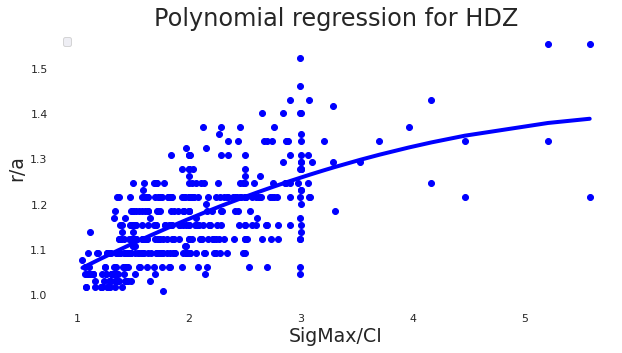

In [ ]:
ax= plt.gca(facecolor = 'w')
plt.scatter(x_HDZ, y_HDZ, color='blue')
plt.plot(x_HDZ, y_pred_HDZ_sk, color = 'blue', linewidth = 4)
plt.legend(loc='upper left')
plt.title('Polynomial regression for HDZ', size= 24)
plt.xlabel('SigMax/CI', size = 19)
plt.ylabel('r/a',size=19)

### 1.3.2 EDZi

In [ ]:
x_train_EDZi_poly, x_test_EDZi_poly, y_train_EDZi_poly, y_test_EDZi_poly = train_test_split(xp_EDZi, y_EDZi, test_size = 0.2, random_state = 13)

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Reg_EDZi = LinearRegression()
poly.fit(x_train_EDZi_poly, y_train_EDZi_poly)
Linear_Reg_EDZi.fit(x_train_EDZi_poly, y_train_EDZi_poly)

LinearRegression()

In [ ]:
print("""
The x^2 and x^1 coefficients of the fitted polynomial line for HDZ are: {:.3f}, {:.3f}, respectively.And the intercept would be {:.3f}!
""".format(Linear_Reg_EDZi.coef_[0][1], Linear_Reg_EDZi.coef_[0][2], Linear_Reg_EDZi.intercept_[0]))


The x^2 and x^1 coefficients of the fitted polynomial line for HDZ are: 0.276, -0.020, respectively.And the intercept would be 0.899!



In [ ]:
y_pred_EDZi_train_SK= Linear_Reg_EDZi.predict(x_train_EDZi_poly)
y_pred_EDZi_test_SK= Linear_Reg_EDZi.predict(x_test_EDZi_poly)
y_pred_EDZi_sk = Linear_Reg_EDZi.predict(xp_EDZi)

In [ ]:
from sklearn.metrics import r2_score
print('The accuracy of the regression model for the training set is: %.2f ' % r2_score(y_train_EDZi_poly, y_pred_EDZi_train_SK))
print('The accuracy of the regression model for the test set is: %.2f ' % r2_score(y_test_EDZi_poly, y_pred_EDZi_test_SK))

The accuracy of the regression model for the training set is: 0.70 
The accuracy of the regression model for the test set is: 0.65 


Text(0, 0.5, 'r/a')

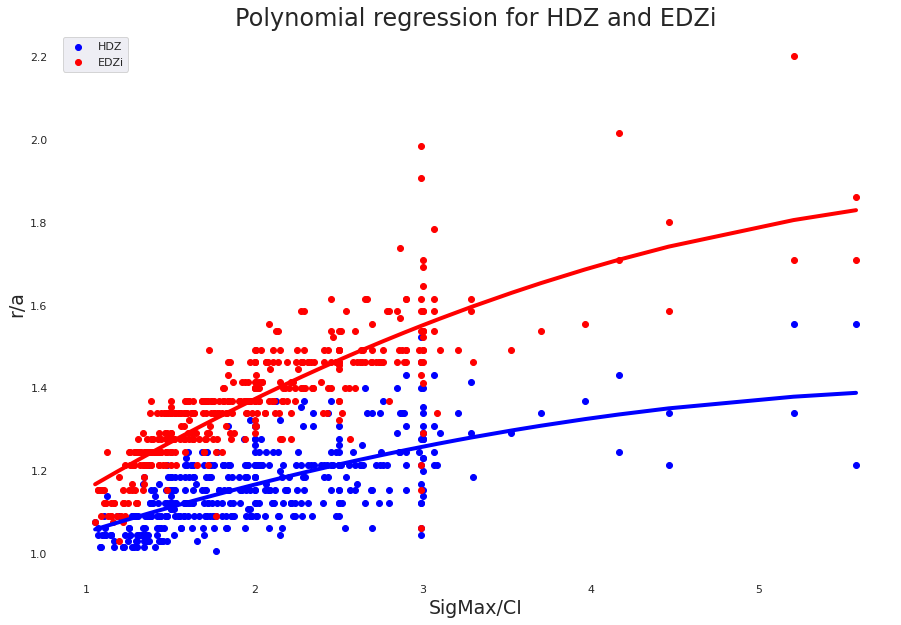

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(x_HDZ, y_HDZ, label=('HDZ'), color='blue')
plt.plot(x_HDZ, y_pred_HDZ_sk, color = 'blue', linewidth = 4)
plt.scatter(x_EDZi, y_EDZi, label ='EDZi', color = 'red')
plt.plot(x_EDZi, y_pred_EDZi_sk, color = 'red',  linewidth = 4)
ax =plt.gca()
ax.set_facecolor("white")
plt.legend(loc='upper left')
plt.title('Polynomial regression for HDZ and EDZi', size= 24)
plt.xlabel('SigMax/CI', size = 19)
plt.ylabel('r/a',size=19)

### 1.3.3 EDZo

In [ ]:
x_train_EDZo_poly, x_test_EDZo_poly, y_train_EDZo_poly, y_test_EDZo_poly = train_test_split(xp_EDZo, y_EDZo, test_size = 0.2, random_state = 13)

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Reg_EDZo = LinearRegression()
poly.fit(x_train_EDZo_poly, y_train_EDZo_poly)
Linear_Reg_EDZo.fit(x_train_EDZo_poly, y_train_EDZo_poly)

LinearRegression()

In [ ]:
print("""
The x^2 and x^1 coefficients of the fitted polynomial line for HDZ are: {:.3f}, {:.3f}, respectively.And the intercept would be {:.3f}!
""".format(Linear_Reg_EDZo.coef_[0][1], Linear_Reg_EDZo.coef_[0][2], Linear_Reg_EDZo.intercept_[0]))


The x^2 and x^1 coefficients of the fitted polynomial line for HDZ are: 0.809, -0.164, respectively.And the intercept would be 0.494!



In [ ]:
ypred_EDZo_train_SK= Linear_Reg_EDZo.predict(x_train_EDZo_poly)
ypred_EDZo_test_SK= Linear_Reg_EDZo.predict(x_test_EDZo_poly)
ypred_EDZo_sk = Linear_Reg_EDZo.predict(xp_EDZo)

In [ ]:
from sklearn.metrics import r2_score
print('The accuracy of the regression model for the training set is: %.2f ' % r2_score(y_train_EDZo_poly, ypred_EDZo_train_SK))
print('The accuracy of the regression model for the test set is: %.2f ' % r2_score(y_test_EDZo_poly, ypred_EDZo_test_SK))

The accuracy of the regression model for the training set is: 0.88 
The accuracy of the regression model for the test set is: 0.87 


Text(0.5, 1.0, 'Polynomial regression plots using Scikit-learn')

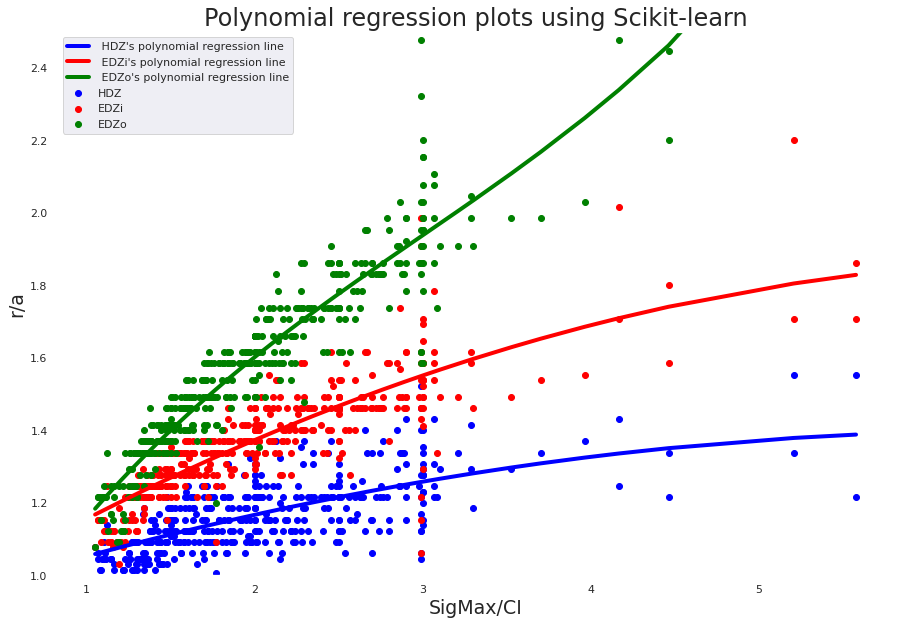

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(x_HDZ, y_HDZ, label=('HDZ'), color = 'blue')
plt.plot(x_HDZ, y_pred_HDZ_sk, linewidth = 4, color = 'blue', label= ' HDZ\'s polynomial regression line')
plt.scatter(x_EDZi, y_EDZi, label ='EDZi',  color = 'red')
plt.plot(x_EDZi, y_pred_EDZi_sk, linewidth = 4, color = 'red', label= ' EDZi\'s polynomial regression line')
plt.scatter(x_EDZo, y_EDZo, label ='EDZo',  color = 'green')
plt.plot(x_EDZo, ypred_EDZo_sk, linewidth = 4,  color = 'green', label= ' EDZo\'s polynomial regression line')
ax =plt.gca()
ax.set_facecolor("white")
plt.xlabel('SigMax/CI', size =19)
plt.ylim(1, 2.5)
plt.ylabel ('r/a', size =19)
plt.legend(loc = 'upper left')
plt.title('Polynomial regression plots using Scikit-learn', size = 24)

## 1.4 Comparison of Stats Model vs Scikit-Learn polynomial regressions

Text(0.5, 1.0, 'Comparison of polynomial regression of Stats model and Scikit-learn')

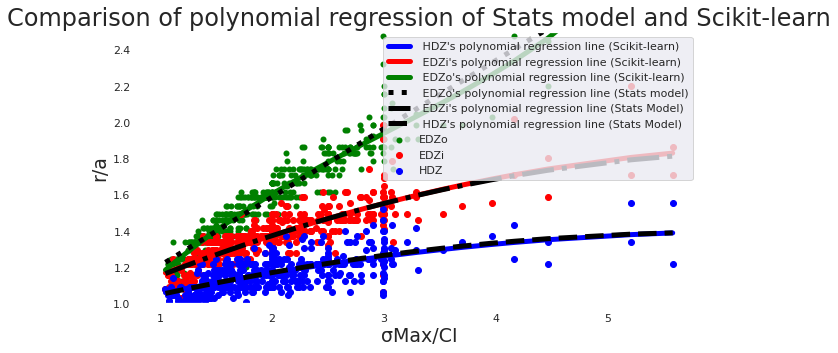

In [ ]:
plt.plot(x_HDZ, y_pred_HDZ_sk, linewidth = 5, color = 'blue', \
         label= ' HDZ\'s polynomial regression line (Scikit-learn)')
plt.plot(x_EDZi, y_pred_EDZi_sk, linewidth = 5, color = 'red', \
         label= ' EDZi\'s polynomial regression line (Scikit-learn)')
plt.plot(x_EDZo, ypred_EDZo_sk, linewidth = 5, color = 'green',\
         label= ' EDZo\'s polynomial regression line (Scikit-learn)')
plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', linewidth = .01, color= 'green')
plt.plot(x_EDZo, y_pred_EDZo, linewidth = 5, linestyle='dotted', color = 'black',\
         label= ' EDZo\'s polynomial regression line (Stats model)')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color= 'red')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 5, linestyle='dashdot', color = 'black',\
         label= ' EDZi\'s polynomial regression line (Stats Model)')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color= 'blue')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 5, linestyle='dashed', color = 'black',\
         label= ' HDZ\'s polynomial regression line (Stats Model)')
plt.ylim(1.0, 2.5)
ax =plt.gca()
ax.set_facecolor("white")
plt.xlabel('\u03C3Max/CI', size = 19)
plt.ylabel('r/a', size = 19)
plt.legend()
plt.title('Comparison of polynomial regression of Stats model and Scikit-learn', size = 24)


This visualization helps realizing that they almost did the same thing and validates our machine learning approach

## 1.5 Comparison of Perras and Diederichs regressions and the machine learning approach




In [ ]:
# HDZ regression formula
B_HDZ = 0.154514643
D_HDZ = 0.64795508
y_HDZ_Perras = 1 + B_HDZ*((x_HDZ -1)**D_HDZ)
# EDZi regression formula
B_EDZi = 0.374842163
D_EDZi = 0.501140342
y_EDZi_Perras = 1 + B_EDZi*((x_EDZi -1)**D_EDZi)
# EDZo regression formula
B_EDZo = 0.60887864
D_EDZo = 0.591845871
y_EDZo_Perras = 1 + B_EDZo*((x_EDZo -1)**D_EDZo)

Text(0.5, 1.0, 'Comparison of polynomial regression lines Scikit-learn and Perras and Diederichs')

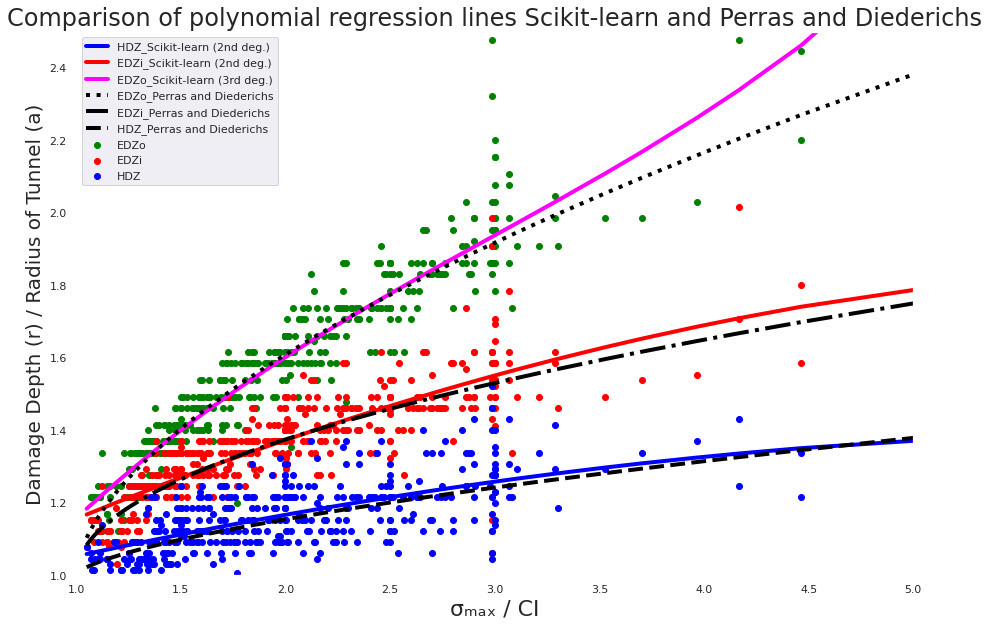

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', color = 'green')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color = 'red')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color = 'blue')
plt.plot(x_HDZ, y_pred_HDZ_sk, linewidth = 4, color = 'blue', label='HDZ_Scikit-learn (2nd deg.)')
plt.plot(x_EDZi, y_pred_EDZi_sk, linewidth = 4, color = 'red', label='EDZi_Scikit-learn (2nd deg.)')
plt.plot(x_EDZo, ypred_EDZo_sk, linewidth = 4, color = 'magenta', label='EDZo_Scikit-learn (3rd deg.)')
plt.plot(x_EDZo, y_EDZo_Perras, linewidth = 4, linestyle='dotted', color = 'black', label='EDZo_Perras and Diederichs')
plt.plot(x_EDZi, y_EDZi_Perras, linewidth = 4, linestyle='dashdot', color = 'black', label='EDZi_Perras and Diederichs')
plt.plot(x_HDZ, y_HDZ_Perras, linewidth = 4, linestyle='dashed', color = 'black',label='HDZ_Perras and Diederichs')
ax =plt.gca()
ax.set_facecolor("white")
plt.ylim(1.0, 2.5)
plt.xlim(1,5)
plt.legend()
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.title('Comparison of polynomial regression lines Scikit-learn and Perras and Diederichs', size= 24)

# **2. Multi classification using "Logistic Regression"**





## 2.1 Initial Steps

In [ ]:
inputs = edz.drop('Region', axis=1)
inputs.head()

,SigMax/CI,r/a
0,2.542783,1.184615
1,2.789586,1.215385
2,2.451743,1.153846
3,2.468652,1.215385
4,2.512763,1.215385


In [ ]:
output = edz['Region']

In [ ]:
output.head()

0    2
1    2
2    2
3    2
4    2
Name: Region, dtype: int64

## 2.2 Splitting data into **train-test** sets only

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size= 0.2, shuffle = True, random_state = 13) 

In [ ]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1040, 2) (261, 2) (1040,) (261,)


## 2.3 Splitting the train set into **Stratified K-Folds** (K=5) for hyperparameters tunning

In [ ]:
C_values = [0.1, 1, 10, 100]
Solver_values = ['lbfgs', 'newton-cg', 'sag', 'saga']
Multi_class = ['ovr', 'auto', 'multinomial']
for i in C_values:
  for j in Solver_values:
    for k in Multi_class:
      model_accuracy_mean =cross_val_score(LogisticRegression(C= i , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy').mean()
      # model_accuracy =cross_val_score(LogisticRegression(C= i , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
      print("The average of model ACCURACY with C = {}, solver = {} and multiclass = {} is: {:.3f}".format(i, j, k, model_accuracy_mean))
      # print('The actual values are: ', model_accuracy)

The average of model ACCURACY with C = 0.1, solver = lbfgs and multiclass = ovr is: 0.763
The average of model ACCURACY with C = 0.1, solver = lbfgs and multiclass = auto is: 0.832
The average of model ACCURACY with C = 0.1, solver = lbfgs and multiclass = multinomial is: 0.832
The average of model ACCURACY with C = 0.1, solver = newton-cg and multiclass = ovr is: 0.763
The average of model ACCURACY with C = 0.1, solver = newton-cg and multiclass = auto is: 0.832
The average of model ACCURACY with C = 0.1, solver = newton-cg and multiclass = multinomial is: 0.832
The average of model ACCURACY with C = 0.1, solver = sag and multiclass = ovr is: 0.763
The average of model ACCURACY with C = 0.1, solver = sag and multiclass = auto is: 0.832
The average of model ACCURACY with C = 0.1, solver = sag and multiclass = multinomial is: 0.832
The average of model ACCURACY with C = 0.1, solver = saga and multiclass = ovr is: 0.763
The average of model ACCURACY with C = 0.1, solver = saga and multic

In here we realize that the models with the best accuracy which is 0.865 are  the ones with multi-class as "auto" or "multinomial", "C=1" and all the solvers. So for the other scoring values for tunning the parameters our parameters will be narrowed... 

In [ ]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
Solver_values = ['lbfgs', 'newton-cg', 'sag', 'saga']
Multi_class = ['auto', 'multinomial']
for j in Solver_values:
  for k in Multi_class:
    model_accuracy =cross_val_score(LogisticRegression(C= 1 , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_squared_error').mean()
    print("The model\'s MEAN SQUARED ERROR value with C = 1, solver = {} and multiclass = {} is: {:.3f}".format(j, k, model_accuracy))

The model's MEAN SQUARED ERROR value with C = 1, solver = lbfgs and multiclass = auto is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = lbfgs and multiclass = multinomial is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = newton-cg and multiclass = auto is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = newton-cg and multiclass = multinomial is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = sag and multiclass = auto is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = sag and multiclass = multinomial is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = saga and multiclass = auto is: -0.342
The model's MEAN SQUARED ERROR value with C = 1, solver = saga and multiclass = multinomial is: -0.342


So no difference in here, let's try something else!

In [ ]:
Solver_values = ['lbfgs', 'newton-cg', 'sag', 'saga']
Multi_class = ['auto', 'multinomial']
for j in Solver_values:
  for k in Multi_class:
    model_accuracy =cross_val_score(LogisticRegression(C= 1 , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_absolute_error').mean()
    print("The model\'s MEAN ABSOLUTE ERROR value with C = 1, solver = {} and multiclass = {} is: {:.3f}".format(j, k, model_accuracy))

The model's MEAN ABSOLUTE ERROR value with C = 1, solver = lbfgs and multiclass = auto is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = lbfgs and multiclass = multinomial is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = newton-cg and multiclass = auto is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = newton-cg and multiclass = multinomial is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = sag and multiclass = auto is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = sag and multiclass = multinomial is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = saga and multiclass = auto is: -0.204
The model's MEAN ABSOLUTE ERROR value with C = 1, solver = saga and multiclass = multinomial is: -0.204


Not much of a difference in here as well...

In [ ]:
Solver_values = ['lbfgs', 'newton-cg', 'sag', 'saga']
Multi_class = ['auto', 'multinomial']
for j in Solver_values:
  for k in Multi_class:
    model_accuracy =cross_val_score(LogisticRegression(C= 1 , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='recall').mean()
    print("The model\'s RECALL value with C = 1, solver = {} and multiclass = {} is: {:.3f}".format(j, k, model_accuracy))


The model's RECALL value with C = 1, solver = lbfgs and multiclass = auto is: nan
The model's RECALL value with C = 1, solver = lbfgs and multiclass = multinomial is: nan
The model's RECALL value with C = 1, solver = newton-cg and multiclass = auto is: nan
The model's RECALL value with C = 1, solver = newton-cg and multiclass = multinomial is: nan
The model's RECALL value with C = 1, solver = sag and multiclass = auto is: nan
The model's RECALL value with C = 1, solver = sag and multiclass = multinomial is: nan
The model's RECALL value with C = 1, solver = saga and multiclass = auto is: nan
The model's RECALL value with C = 1, solver = saga and multiclass = multinomial is: nan


I've been trying other scoring parameters but no luck..., so let's just choose one of them. I'll go with lbfgs as solver, C=1, and multinomial as the multiclass

## 2.4 Hyper Parameter Tunning_ScikitLearn

In [ ]:
from sklearn.model_selection import GridSearchCV
model_logistic_GCV=LogisticRegression()
params_logistic_GCV={'C':[0.1, 1, 10, 100],
                     'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
                     'multi_class':['ovr', 'auto', 'multinomial']}
gridSearchCV=GridSearchCV(model_logistic_GCV, params_logistic_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
gridSearchCV.fit(x_train, y_train)
gridSearchCV.best_params_

{'C': 1, 'multi_class': 'auto', 'solver': 'lbfgs'}

## 2.5 Plotting different C for visualization purposes

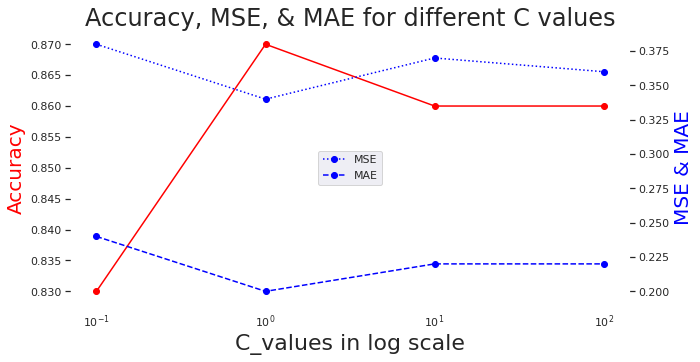

In [ ]:
C_values = [0.1, 1, 10, 100]
accuracy_c= []
MSE_c= []
MAE_c= []
for i in C_values:
  accuracy_c.append(cross_val_score(LogisticRegression(C= i , solver= 'lbfgs' , multi_class = 'multinomial'), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy').mean().round(2))
  MSE_c.append(abs(cross_val_score(LogisticRegression(C= i , solver= 'lbfgs' , multi_class = 'multinomial'), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_squared_error').mean().round(2)))
  MAE_c.append(abs(cross_val_score(LogisticRegression(C= i , solver= 'lbfgs' , multi_class = 'multinomial'), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_absolute_error').mean().round(2)))
# print('The MSE values for different C values are: ',MSE_c)
# print('The MAE values for different C values are: ',MAE_c)
# print('The Accuracy values for different C values are: ',accuracy_c)
ax=plt.axes(facecolor='white', xscale=('log'), xticks=([0.1, 1, 10, 100]))
ax.plot(C_values, accuracy_c, color = 'red', label='Accuracy', marker='o')
ax.set_ylabel("Accuracy",color="red",fontsize=20)
ax2=ax.twinx()
ax2.plot(C_values, MSE_c, color = 'blue', label='MSE', linestyle='dotted', marker='o')
ax2.plot(C_values, MAE_c, color = 'blue', label='MAE', linestyle='dashed', marker='o')
ax2.set_ylabel("MSE & MAE",color="blue",fontsize=20)
ax.set_xlabel('C_values in log scale', size =22 )
ax2.legend(loc='center')
plt.title('Accuracy, MSE, & MAE for different C values', size= 24)
plt.grid()


## 2.6 Model training

In [ ]:
model = LogisticRegression(solver ='lbfgs', C = 1, multi_class='multinomial')

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(C=1, multi_class='multinomial')

In [ ]:
model.score(x_test, y_test)

0.8850574712643678

In [ ]:
model.predict_proba(x_test)

array([[3.98638356e-01, 1.13076858e-01, 4.88284786e-01],
       [1.97862625e-01, 7.99522902e-01, 2.61447284e-03],
       [3.96038345e-01, 5.92837278e-03, 5.98033282e-01],
       [1.91740863e-01, 5.61679180e-03, 8.02642345e-01],
       [7.21584017e-01, 2.00579527e-01, 7.78364560e-02],
       [2.90694473e-01, 3.41523901e-02, 6.75153137e-01],
       [5.49933486e-01, 4.97491760e-02, 4.00317338e-01],
       [4.86273027e-01, 7.19960488e-02, 4.41730924e-01],
       [2.85322677e-01, 6.72837578e-01, 4.18397444e-02],
       [1.27523275e-01, 8.70571289e-01, 1.90543578e-03],
       [5.74324706e-01, 2.45149970e-01, 1.80525324e-01],
       [5.40070475e-01, 8.28240179e-02, 3.77105507e-01],
       [3.32542171e-01, 6.10876144e-02, 6.06370215e-01],
       [4.28782760e-01, 4.02570942e-01, 1.68646298e-01],
       [4.90778854e-01, 2.24009092e-01, 2.85212055e-01],
       [3.21232435e-01, 6.34713397e-01, 4.40541673e-02],
       [7.27265373e-01, 8.87082670e-02, 1.84026360e-01],
       [4.81067753e-01, 4.15706

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted_train = model.predict(x_train)

In [ ]:
accuracy_score(y_test, model.predict(x_test))

0.8850574712643678

In [ ]:
y_predicted

array([2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1,
       2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2])

In [ ]:
np.array(y_test)

array([0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_logistic = confusion_matrix (y_test, y_predicted)

Text(66.5, 0.5, 'Truth')

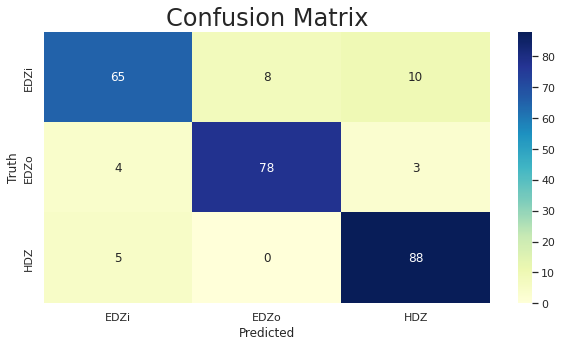

In [ ]:
plt.figure (figsize = (10, 5))
sns.heatmap(confusion_logistic, annot = True, xticklabels=('EDZi', 'EDZo', 'HDZ'),  yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu' )
plt.xlabel ('Predicted')
plt.title('Confusion Matrix', size=24)
plt.ylabel ('Truth')

In [ ]:
# model.predict_proba(x_test)

In [ ]:
# model.predict(x_test)

In [ ]:
# y_train

In [ ]:
# model.coef_

In [ ]:
# model.intercept_

In [ ]:
 from sklearn.metrics import precision_score, recall_score

## 2.7 Plotting the Decision Boundary of the Logistic Regression Model









In [ ]:
xx, yy = np.mgrid[1:7:.01, 1:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_logistic = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_logistic = model.predict_proba(grid)[:, 2].reshape(xx.shape)

In [ ]:
# f, ax = plt.subplots(figsize=(8, 6))
# contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
#                       vmin=0, vmax=1)
# ax_c = f.colorbar(contour)
# ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

# ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
#        xlim=(-5, 5), ylim=(-5, 5),
#        xlabel="$X_1$", ylabel="$X_2$")
#cmap="bl", cmap="PuBuGn"


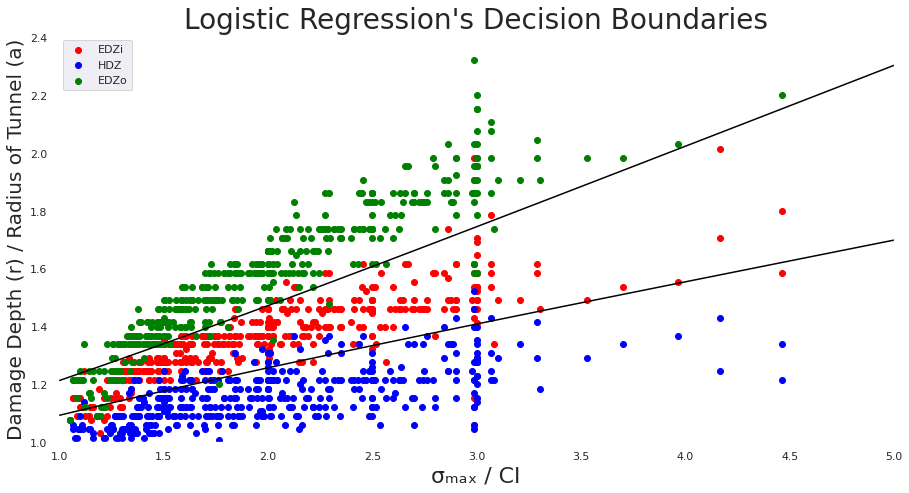

In [ ]:
plt.figure(figsize=(15,7.5))
ax=plt.gca(facecolor='white')
plt.contour(xx, yy, probs1_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1, label = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_logistic, levels=[.5], cmap="Greys",vmin=0, vmax=.1, label = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color= 'red')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color='blue')
plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', color = 'green')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.title('Logistic Regression\'s Decision Boundaries', size =28)
plt.legend(loc = 'upper left')
ax =plt.gca()
# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
# ax.legend([line1, line2], ['1', '2'])
# ax.legend(['Decision boundary of HDZ and EDZi', 'Decision boundary of EDZi and EDZo'] )

# ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
#        xlim=(-5, 5), ylim=(-5, 5),
#        xlabel="$X_1$", ylabel="$X_2$")

## 2.8 Plotting Receiver Operating Characteristics (ROC) Curve for the multiclassification logistic model








**ROC:  TPR vs FPR**

1.   TPR (Sensitivity)   = TP / TP+FN
2.   FPR (1-Specificity) = FP / TN+FP

### 2.8.1 Prediction Probabilities

In [ ]:
probs_ordinary =np.array([0 for x in range(len(y_test))]).reshape(-1,1)
logistic_probs = model.predict_proba(x_test)
logistic_probs.shape

(261, 3)

In [ ]:
# (logistic_probs.reshape(-1,1)).shape

### 2.8.2 Computing AUROC and ROC curve values

AUROC : Area under ROC curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# logistic_auc = roc_auc_score (y_test, logistic_probs, multi_class='multinomial')
# print('The logistic regression AUROC is: %.3f' %logistic_auc)

In [ ]:
# FPR, TPR = roc_curve(y_test, y_predicted)

 Because we've done **multiclassification**, then it is not possible to calculate **TPR** or **FPR** so not possible to plot **ROC** curve unless we make it somehow **Binary classifications**

###2.8.3 Plotting ROC curve of the Logistic Regression for **multiclassification** considering each as **Binary Classification**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
Logistic_OVRC= OneVsRestClassifier(LogisticRegression(solver ='lbfgs', C = 1, multi_class='multinomial'))
Logistic_OVRC.fit(x_train, y_train)
y_pred_OVRC = Logistic_OVRC.predict(x_test)
y_pred_prob_OVRC = Logistic_OVRC.predict_proba(x_test)

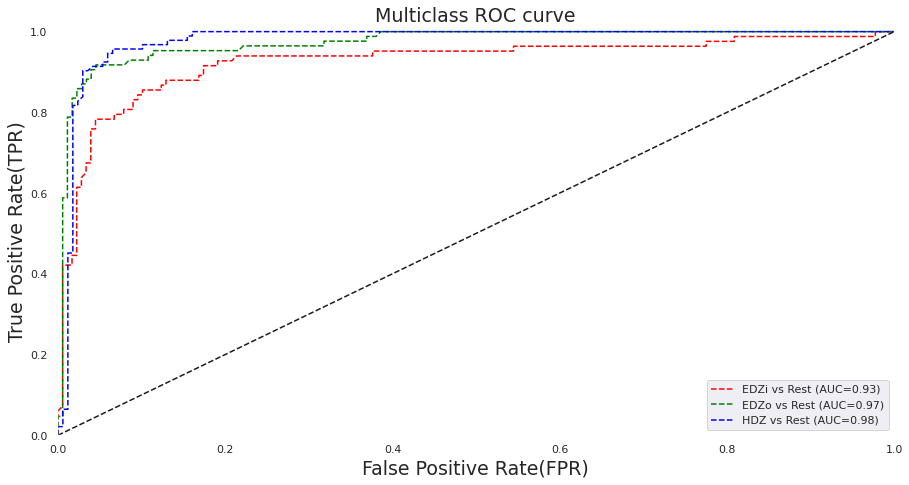

In [ ]:
from sklearn.preprocessing import label_binarize
plt.figure(figsize=(15,7.5))

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])
ax = plt.axes()
ax.set_facecolor("white")
# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 19)
plt.ylabel('True Positive Rate(TPR)', size = 19)
plt.legend(loc='lower right')
plt.show()

# **3. Multi classification using "K-Nearest Neighbor (KNN)"**

## 3.1 Parameter Tunning

In [ ]:
# ACCURACY
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
n_neighbors = [1, 3, 5, 7, 9, 11,13]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]
for i in n_neighbors:
  for j in weights:
    for k in algorithm:
      for l in p:
        model_accuracy_mean_KNN =cross_val_score(KNeighborsClassifier(n_neighbors= i , weights= j , algorithm = k, p=l), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy').mean()
        # model_accuracy =cross_val_score(LogisticRegression(C= i , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
        if model_accuracy_mean_KNN > 0.879:
          print("The average of model ACCURACY with n_neighbors = {}, weights = {}, algorithm = {}, and p={} is: {:.3f}".format(i, j, k, l, model_accuracy_mean_KNN))
        # print('The actual values are: ', model_accuracy)

The average of model ACCURACY with n_neighbors = 7, weights = uniform, algorithm = auto, and p=1 is: 0.880
The average of model ACCURACY with n_neighbors = 7, weights = uniform, algorithm = kd_tree, and p=1 is: 0.880
The average of model ACCURACY with n_neighbors = 11, weights = uniform, algorithm = auto, and p=1 is: 0.887
The average of model ACCURACY with n_neighbors = 11, weights = uniform, algorithm = ball_tree, and p=1 is: 0.887
The average of model ACCURACY with n_neighbors = 11, weights = uniform, algorithm = kd_tree, and p=1 is: 0.887
The average of model ACCURACY with n_neighbors = 11, weights = uniform, algorithm = brute, and p=1 is: 0.886
The average of model ACCURACY with n_neighbors = 13, weights = uniform, algorithm = auto, and p=1 is: 0.885
The average of model ACCURACY with n_neighbors = 13, weights = uniform, algorithm = ball_tree, and p=1 is: 0.885
The average of model ACCURACY with n_neighbors = 13, weights = uniform, algorithm = kd_tree, and p=1 is: 0.885
The averag

In [ ]:
# MSE 
n_neighbors = [7, 11,13]
algorithm = ['auto', 'ball_tree', 'kd_tree']

for i in n_neighbors:
  for k in algorithm:
    model_MSE_mean_KNN =abs(cross_val_score(KNeighborsClassifier(n_neighbors= i , weights= 'uniform' , algorithm = k, p=1), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_squared_error').mean())
        # model_accuracy =cross_val_score(LogisticRegression(C= i , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
    print("The average of model MSE with n_neighbors = {}, and algorithm = {}, is: {:.3f}".format(i, k, model_MSE_mean_KNN))
        # print('The actual values are: ', model_accuracy)

The average of model MSE with n_neighbors = 7, and algorithm = auto, is: 0.282
The average of model MSE with n_neighbors = 7, and algorithm = ball_tree, is: 0.283
The average of model MSE with n_neighbors = 7, and algorithm = kd_tree, is: 0.282
The average of model MSE with n_neighbors = 11, and algorithm = auto, is: 0.261
The average of model MSE with n_neighbors = 11, and algorithm = ball_tree, is: 0.261
The average of model MSE with n_neighbors = 11, and algorithm = kd_tree, is: 0.261
The average of model MSE with n_neighbors = 13, and algorithm = auto, is: 0.268
The average of model MSE with n_neighbors = 13, and algorithm = ball_tree, is: 0.268
The average of model MSE with n_neighbors = 13, and algorithm = kd_tree, is: 0.268


In [ ]:
# MAE
n_neighbors = [7, 11,13]
algorithm = ['auto', 'ball_tree', 'kd_tree']

for i in n_neighbors:
  for k in algorithm:
    model_MAE_mean_KNN =abs(cross_val_score(KNeighborsClassifier(n_neighbors= i , weights= 'uniform' , algorithm = k, p=1), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_absolute_error').mean())
        # model_accuracy =cross_val_score(LogisticRegression(C= i , solver= j , multi_class = k), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
    print("The average of model MAE with n_neighbors = {}, and algorithm = {}, is: {:.3f}".format(i, k, model_MAE_mean_KNN))
        # print('The actual values are: ', model_accuracy)

The average of model MAE with n_neighbors = 7, and algorithm = auto, is: 0.174
The average of model MAE with n_neighbors = 7, and algorithm = ball_tree, is: 0.175
The average of model MAE with n_neighbors = 7, and algorithm = kd_tree, is: 0.174
The average of model MAE with n_neighbors = 11, and algorithm = auto, is: 0.163
The average of model MAE with n_neighbors = 11, and algorithm = ball_tree, is: 0.163
The average of model MAE with n_neighbors = 11, and algorithm = kd_tree, is: 0.163
The average of model MAE with n_neighbors = 13, and algorithm = auto, is: 0.166
The average of model MAE with n_neighbors = 13, and algorithm = ball_tree, is: 0.166
The average of model MAE with n_neighbors = 13, and algorithm = kd_tree, is: 0.166


So it was cocluded that when **n=11**, **weight= 'uniform'**, **p=1** and regardless of the algorithm to be **'auto'**, **'ball_tree'**, or **'kd_tree'** the accuracy is the highest and the error is the lowest.

## 3.2 Hyper parameter tunning_Scikit-Learn

In [ ]:
from sklearn.model_selection import GridSearchCV
model_KNN_GCV=KNeighborsClassifier()
params_KNN_GCV={'n_neighbors' : [1, 3, 5, 7, 9, 11,13],
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p':[1,2]}
gridSearchCV=GridSearchCV(model_KNN_GCV, params_KNN_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='neg_mean_absolute_error')
gridSearchCV.fit(x_train, y_train)
gridSearchCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

## 3.2 Model training

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto', p=1)
knn_model.fit(x_train, y_train)
confusion_matrix_KNN=confusion_matrix(y_test, knn_model.predict(x_test))

Text(66.5, 0.5, 'Truth')

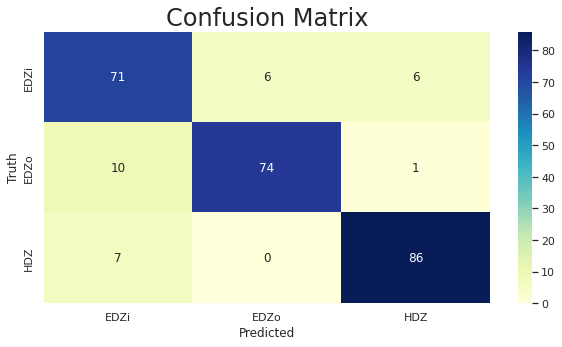

In [ ]:
plt.figure (figsize = (10, 5))
sns.heatmap(confusion_matrix_KNN, annot = True, xticklabels=('EDZi', 'EDZo', 'HDZ'),  yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu' )
plt.xlabel ('Predicted')
plt.title('Confusion Matrix', size=24)
plt.ylabel ('Truth')

In [ ]:
model.predict(x_test)

array([2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1,
       2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2])

In [ ]:
knn_model.predict(x_test)

array([0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2,
       1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

## 3.3 Plotting the Decision Boundary of the Logistic Regression Model


In [ ]:
xx, yy = np.mgrid[1:7:.01, 1:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_KNN = knn_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_KNN = knn_model.predict_proba(grid)[:, 2].reshape(xx.shape)

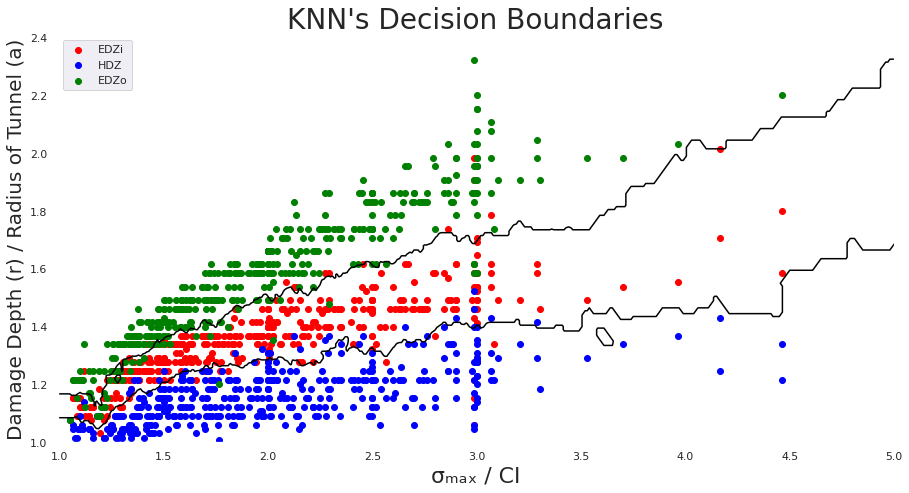

In [ ]:
plt.figure(figsize=(15,7.5))
ax=plt.gca(facecolor='white')
plt.contour(xx, yy, probs1_KNN, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_KNN, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color= 'red')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color='blue')
plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', color = 'green')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.title('KNN\'s Decision Boundaries', size =28)
plt.legend(loc = 'upper left')
ax =plt.gca()

## 3.4 Plotting ROC Curve_KNN Classifier

In [ ]:
KNN_OVRC= OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto', p=1))
KNN_OVRC.fit(x_train, y_train)
y_pred_OVRC_KNN = KNN_OVRC.predict(x_test)
y_pred_prob_OVRC_KNN = KNN_OVRC.predict_proba(x_test)

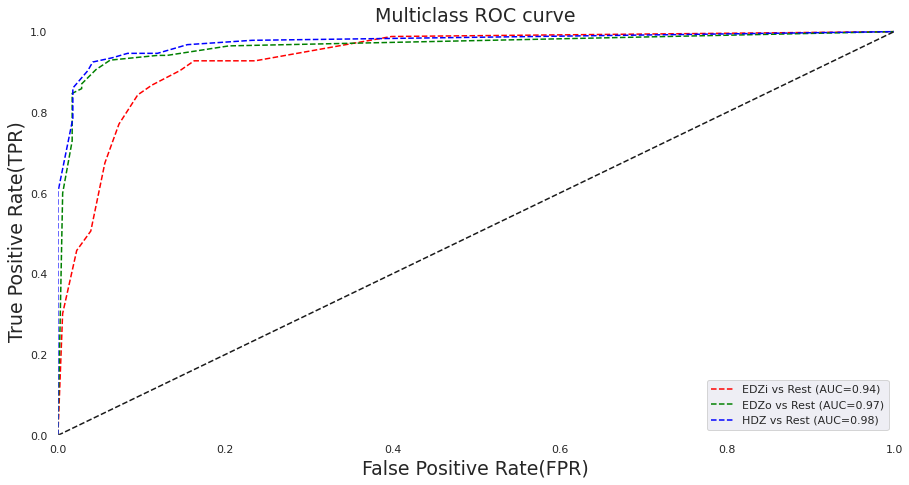

In [ ]:
plt.figure(figsize=(15,7.5))

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC_KNN[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])
ax = plt.axes()
ax.set_facecolor("white")
# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 19)
plt.ylabel('True Positive Rate(TPR)', size = 19)
plt.legend(loc='lower right')
plt.show()

#**4. Multi classification using "Support Vector Machine (SVM)"**

## 4.1 Hyper-parameter Tunning

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model_SVM_GCV=svm.SVC()
params_SVM_GCV={'C' : [0.1, 1, 10, 100],
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree' : [2, 3],
                'gamma' : ['scale', 'auto'],
                'decision_function_shape' : ['ovo', 'ovr'],
                'tol' : [1e-3, 1e-2, 1e-1]}
gridSearchCV_SVM=GridSearchCV(model_SVM_GCV, params_SVM_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
gridSearchCV_SVM.fit(x_train, y_train)
gridSearchCV_SVM.best_params_

{'C': 100,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'rbf',
 'tol': 0.1}

In [ ]:
gridSearchCV_SVM.best_params_

{'C': 100,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'rbf',
 'tol': 0.1}

## 4.2 Model Training

In [ ]:
SVM_model=svm.SVC(C=100, kernel='rbf', degree=2, decision_function_shape='ovo', gamma = 'auto', tol=0.1, probability = True)
SVM_model.fit(x_train, y_train)
confusion_matrix_SVM=confusion_matrix(y_test, SVM_model.predict(x_test))

Text(66.5, 0.5, 'Truth')

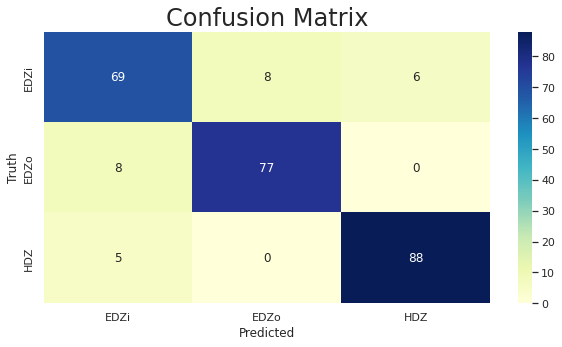

In [ ]:
plt.figure (figsize = (10, 5))
sns.heatmap(confusion_matrix_SVM, annot = True, xticklabels=('EDZi', 'EDZo', 'HDZ'),  yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu' )
plt.xlabel ('Predicted')
plt.title('Confusion Matrix', size=24)
plt.ylabel ('Truth')

## 4.2 Plotting decision boundary_SVM

In [ ]:
xx, yy = np.mgrid[1:7:.01, 1:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_SVM = SVM_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_SVM = SVM_model.predict_proba(grid)[:, 2].reshape(xx.shape)

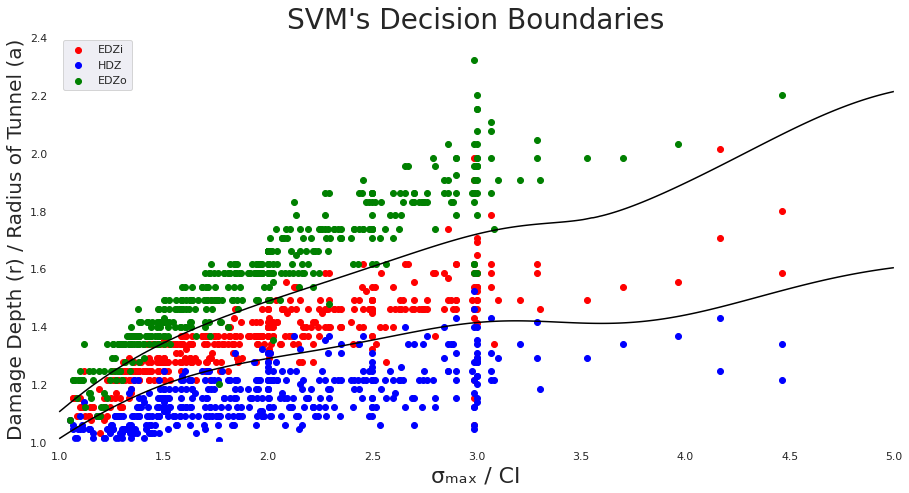

In [ ]:
plt.figure(figsize=(15,7.5))
ax=plt.gca(facecolor='white')
plt.contour(xx, yy, probs1_SVM, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_SVM, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_EDZi, y_EDZi, label = 'EDZi', color= 'red')
plt.scatter (x_HDZ, y_HDZ, label = 'HDZ', color='blue')
plt.scatter(x_EDZo, y_EDZo, label = 'EDZo', color = 'green')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.title('SVM\'s Decision Boundaries', size =28)
plt.legend(loc = 'upper left')
ax =plt.gca()

## 4.3 Plotting ROC curve for SVM 

In [ ]:
SVM_OVRC= OneVsRestClassifier(svm.SVC(C=100, kernel='rbf', degree=2, decision_function_shape='ovo', gamma = 'auto', tol=0.1, probability = True))
SVM_OVRC.fit(x_train, y_train)
y_pred_OVRC_SVM = SVM_OVRC.predict(x_test)
y_pred_prob_OVRC_SVM = SVM_OVRC.predict_proba(x_test)

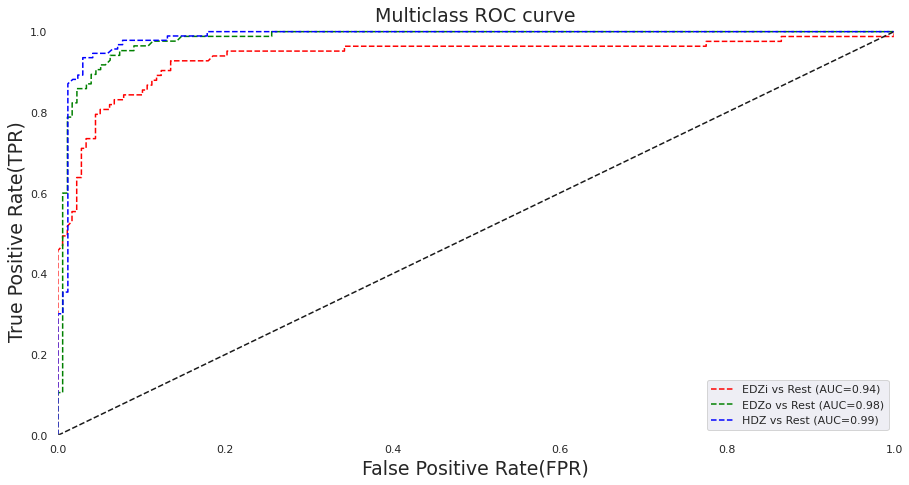

In [ ]:
from sklearn.preprocessing import label_binarize
plt.figure(figsize=(15,7.5))

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC_SVM[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])
ax = plt.axes()
ax.set_facecolor("white")
# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 19)
plt.ylabel('True Positive Rate(TPR)', size = 19)
plt.legend(loc='lower right')
plt.show()